In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import scipy

from scipy import signal

In [2]:
labels = ["episode_type","trial_type","trial_num","subject_num","episode_num","is_corrupt","action_index","trimmed_data"]

data = pd.read_pickle("data/data_final.pkl")

episode_eeg_df, episode_labels_df = data[list(range(1860))], data[labels]

filtered_data = pd.DataFrame()

### create the pass band filter

In [3]:
sampling_rate = 512 #Hz. The rate at which data is received from the mwm
lowest_hz = 1
highest_hz = 80

fL = lowest_hz/sampling_rate #The pass band is 1-80Hz
fH = highest_hz/sampling_rate
b = 0.005
N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # Make sure that N is odd.

n = np.arange(N)
 
# low-pass filter
hlpf = np.sinc(2 * fH * (n - (N - 1) / 2.))
hlpf *= np.blackman(N)
hlpf = hlpf / np.sum(hlpf)
 
# high-pass filter 
hhpf = np.sinc(2 * fL * (n - (N - 1) / 2.))
hhpf *= np.blackman(N)
hhpf = hhpf / np.sum(hhpf)
hhpf = -hhpf
hhpf[int((N - 1) / 2)] += 1

band_pass_filter = np.convolve(hlpf, hhpf)

### filter the data and create new dataframe with labels reattached

In [4]:
for i in range(episode_eeg_df.shape[0]):
    raw = list(episode_eeg_df.iloc[i])
    filtered = list(np.convolve(raw, band_pass_filter))
    filtered_data = filtered_data.append([filtered])

new_data = filtered_data.join(episode_labels_df)

### display differences between individual episodes (filtered vs. unfiltered)

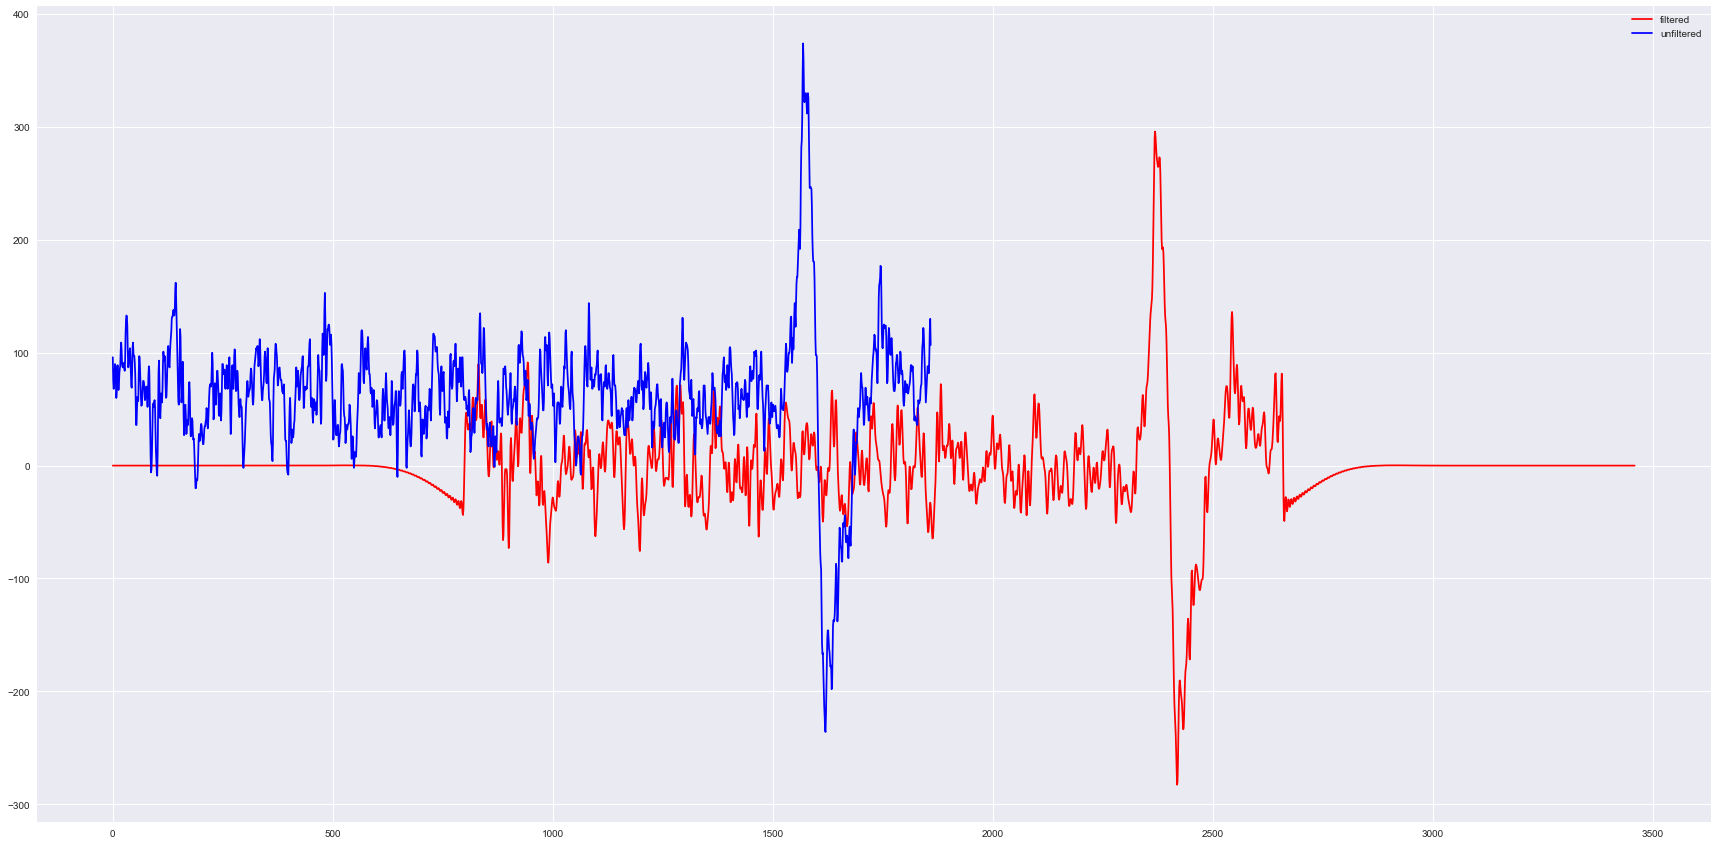

In [5]:
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = [30,15]

epi = 802

plt.plot(filtered_data.iloc[epi],'r-', label="filtered")
plt.plot(episode_eeg_df.iloc[epi], 'b-', label="unfiltered")

plt.legend()
plt.show()

In [86]:
new_data.to_pickle("data_filtered.pkl")